<a href="https://colab.research.google.com/github/moqri/gene-regulatory-network/blob/master/01_Alon_et_al_PNAS_1999.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Broad patterns of gene expression revealed by clustering analysis of tumor and normal colon tissues probed by oligonucleotide arrays

https://www.pnas.org/content/96/12/6745

Figure 1.

![alt text](https://www.pnas.org/content/pnas/96/12/6745/F1.medium.gif
)

Replication using data from https://www.pnas.org/content/95/25/14863

In [1]:
!wget -nc -O array.xls https://www.pnas.org/highwire/filestream/584765/field_highwire_adjunct_files/1/3917data.xls 

File ‘array.xls’ already there; not retrieving.


In [2]:
import pandas as pd
array=pd.read_excel('array.xls',index_col=0,skiprows=2)
array.iloc[:5,:5]

,NAME,alpha 0,alpha 7,alpha 14,alpha 21
ORF,,,,,
YBR166C,TYR1 TYROSINE BIOSYNTHESIS PREPHENATE DEH...,0.33,-0.17,0.04,-0.07
YOR357C,GRD19 SECRETION GOLGI PROTEIN RETENTION,-0.64,-0.38,-0.32,-0.29
YLR292C,SEC72 SECRETION ER PROTEIN TRANSLOCATI...,-0.23,0.19,-0.36,0.14
YGL112C,TAF60 TRANSCRIPTION TFIID 60 KD SUBUNIT,-0.69,-0.89,-0.74,-0.56
YIL118W,RHO3 CYTOSKELETON GTP-BINDING PROTEIN...,0.04,0.01,-0.81,NaN


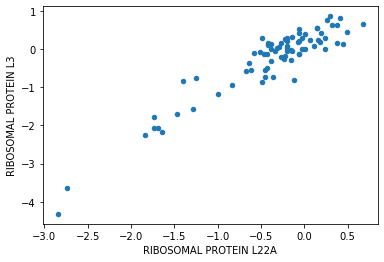

In [3]:
import re
cleaned_names=[re.sub('  ', '_',name).split('_')[-1].strip() for name in array.NAME ]
array.index=cleaned_names
df=array.drop('NAME',1).transpose()
df.plot.scatter('RIBOSOMAL PROTEIN L22A','RIBOSOMAL PROTEIN L3')

Find highest pair-wise correlations:

In [7]:
import numpy as np
corr_matrix = df.corr().abs()

#the matrix is symmetric so we need to extract upper triangle matrix without diagonal (k = 1)
sol = (corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
                 .stack()
                 .sort_values(ascending=False))
sol[:2]

METALLOTHIONEIN        METALLOTHIONEIN          0.989404
RIBOSOMAL PROTEIN S1B  RIBOSOMAL PROTEIN S1A    0.977169
dtype: float64

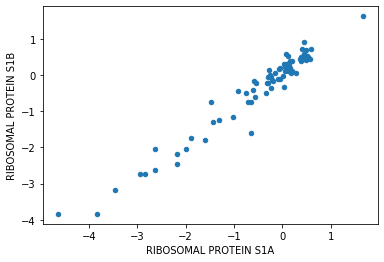

In [6]:
df.plot.scatter('RIBOSOMAL PROTEIN S1A','RIBOSOMAL PROTEIN S1B')